# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [24]:
cities

['mataura',
 'ushuaia',
 'orange cove',
 'bethel',
 'wenling',
 'jamestown',
 'rikitea',
 'albany',
 'corning',
 'vaini',
 'vila',
 'chapais',
 'hambantota',
 'caceres',
 'diffa',
 'northam',
 'kapaa',
 'hilo',
 'vila velha',
 'fairbanks',
 'belushya guba',
 'kazalinsk',
 'mali',
 'narsaq',
 'pelym',
 'airai',
 'new norfolk',
 'qingdao',
 'bluff',
 'leningradskiy',
 'sao joao da barra',
 'taolanaro',
 'hermanus',
 'tual',
 'kulu',
 'los llanos de aridane',
 'itarema',
 'port macquarie',
 'ruatoria',
 'tsihombe',
 'cidreira',
 'victoria',
 'bandar-e lengeh',
 'puerto madero',
 'waipawa',
 'vestmannaeyjar',
 'puerto ayora',
 'keshan',
 'kysyl-syr',
 'manuel doblado',
 'bredasdorp',
 'ancud',
 'burica',
 'upernavik',
 'moussoro',
 'egvekinot',
 'longlac',
 'barentsburg',
 'tateyama',
 'port alfred',
 'baykit',
 'smidovich',
 'husavik',
 'tabuk',
 'kodiak',
 'codrington',
 'necochea',
 'progreso',
 'punta arenas',
 'cape town',
 'hobart',
 'salalah',
 'samusu',
 'nanchang',
 'sumbawa',
 'c

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# Add URL and include type of format of information I wanted returned.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=6dacb0f78eae1680d28aa6631ffa1742&units=imperial&q='

In [27]:
# Create lists to hold data returned from OpenWeatherAPI for fields I am interested in/
# Created c_name to create the list is cities with successful calls.  
# That way I could create a df off successful calls, not include those w/o info.
c_name = []
lat = []
long = []
temp = []
humid = []
cloud = []
wind = []
country = []
city_counter= 0

# Loop through the each city in cities and request data fields.  Add them to each list above.  
# Add 1 to the counter to know how many records were successfully returned.
# Error handling to continue moving through cities list if city wasn't found in OpenWeatherAPI.
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        c_name.append(response['name'])
        city_counter = city_counter + 1
        print(f"Record number: {city_counter}. Adding {city} to list.")
    except:
        print(f"No information available for: {city}")
        pass 

Record number: 1. Adding mataura to list.
Record number: 2. Adding ushuaia to list.
Record number: 3. Adding orange cove to list.
Record number: 4. Adding bethel to list.
Record number: 5. Adding wenling to list.
Record number: 6. Adding jamestown to list.
Record number: 7. Adding rikitea to list.
Record number: 8. Adding albany to list.
Record number: 9. Adding corning to list.
Record number: 10. Adding vaini to list.
Record number: 11. Adding vila to list.
Record number: 12. Adding chapais to list.
Record number: 13. Adding hambantota to list.
Record number: 14. Adding caceres to list.
Record number: 15. Adding diffa to list.
Record number: 16. Adding northam to list.
Record number: 17. Adding kapaa to list.
Record number: 18. Adding hilo to list.
Record number: 19. Adding vila velha to list.
Record number: 20. Adding fairbanks to list.
No information available for: belushya guba
No information available for: kazalinsk
Record number: 21. Adding mali to list.
Record number: 22. Adding

Record number: 166. Adding shenjiamen to list.
Record number: 167. Adding hammerfest to list.
Record number: 168. Adding jadu to list.
Record number: 169. Adding chhuikhadan to list.
Record number: 170. Adding antalaha to list.
Record number: 171. Adding te anau to list.
Record number: 172. Adding crotone to list.
Record number: 173. Adding kaitangata to list.
Record number: 174. Adding cabo san lucas to list.
Record number: 175. Adding ponta do sol to list.
Record number: 176. Adding godda to list.
Record number: 177. Adding kahului to list.
Record number: 178. Adding atambua to list.
Record number: 179. Adding cockburn town to list.
Record number: 180. Adding labuhan to list.
Record number: 181. Adding mecca to list.
Record number: 182. Adding alofi to list.
Record number: 183. Adding klaksvik to list.
Record number: 184. Adding katsuura to list.
No information available for: dubenskiy
No information available for: attawapiskat
Record number: 185. Adding mount isa to list.
Record num

Record number: 325. Adding zhangjiakou to list.
Record number: 326. Adding alyangula to list.
Record number: 327. Adding sfantu gheorghe to list.
Record number: 328. Adding saint george to list.
No information available for: mrirt
Record number: 329. Adding oranjemund to list.
Record number: 330. Adding port shepstone to list.
No information available for: nguiu
Record number: 331. Adding beloye to list.
Record number: 332. Adding laiwu to list.
Record number: 333. Adding la roda to list.
Record number: 334. Adding banyo to list.
Record number: 335. Adding padang to list.
Record number: 336. Adding geraldton to list.
Record number: 337. Adding lac du bonnet to list.
Record number: 338. Adding bon accord to list.
Record number: 339. Adding fortuna to list.
Record number: 340. Adding ixtapa to list.
Record number: 341. Adding serenje to list.
Record number: 342. Adding severo-kurilsk to list.
Record number: 343. Adding kibaya to list.
No information available for: ust-bolsheretsk
Record 

Record number: 487. Adding evensk to list.
Record number: 488. Adding praxedis guerrero to list.
Record number: 489. Adding visby to list.
Record number: 490. Adding polyarnyy to list.
Record number: 491. Adding santa fe to list.
Record number: 492. Adding wahpeton to list.
Record number: 493. Adding creel to list.
Record number: 494. Adding ugoofaaru to list.
Record number: 495. Adding hay river to list.
Record number: 496. Adding roros to list.
Record number: 497. Adding wewak to list.
Record number: 498. Adding cortez to list.
No information available for: jinchengjiang
Record number: 499. Adding hasaki to list.
No information available for: kamenskoye
Record number: 500. Adding linhares to list.
No information available for: kousseri
Record number: 501. Adding sungairaya to list.
No information available for: tuysarkan
Record number: 502. Adding general roca to list.
Record number: 503. Adding byron bay to list.
Record number: 504. Adding kungurtug to list.
Record number: 505. Addi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# create a data frame from cities, lat, and temp
open_weather_dict = {
    "city": c_name,
    "Latitude": lat,
    "Longitude": long,
    "Humidity": humid,
    "Cloud": cloud,
    "Wind": wind,
    "Country": country,
    "Tempurature": temp
}

open_weather_data = pd.DataFrame(open_weather_dict)
open_weather_data.head()


,city,Latitude,Longitude,Humidity,Cloud,Wind,Country,Tempurature
0,Mataura,-46.19,168.86,77,99,1.99,NZ,50.00
1,Ushuaia,-54.81,-68.31,52,75,17.22,AR,41.00
2,Orange Cove,36.62,-119.31,28,86,4.29,US,94.01
3,Bethel,60.79,-161.76,72,90,14.99,US,61.41
4,Wenling,28.38,121.38,92,79,4.36,CN,85.59


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

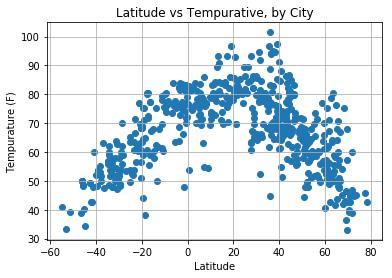

In [30]:
#Create scatterplot of latitude vs. tempurature
plt.scatter(open_weather_data['Latitude'], open_weather_data['Tempurature'], marker="o")

# Add lables for scatterplot
plt.title("Latitude vs Tempurative, by City")
plt.ylabel("Tempurature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save image of scatterplot
plt.savefig("Latitude_v_Temputature_by_City.png")

#show the scatterplot
plt.show()

#### Latitude vs. Humidity Plot

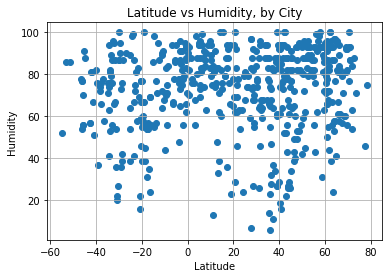

In [31]:
#Create scatterplot of latitude vs. tempurature
plt.scatter(open_weather_data['Latitude'], open_weather_data['Humidity'], marker="o")

# Add lables for scatterplot
plt.title("Latitude vs Humidity, by City")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save image of scatterplot
plt.savefig("Latitude_v_Humidity_by_City.png")

#show the scatterplot
plt.show()

#### Latitude vs. Cloudiness Plot

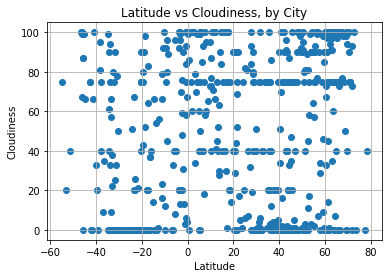

In [32]:
#Create scatterplot of latitude vs. tempurature
plt.scatter(open_weather_data['Latitude'], open_weather_data['Cloud'], marker="o")

# Add lables for scatterplot
plt.title("Latitude vs Cloudiness, by City")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save image of scatterplot
plt.savefig("Latitude_v_Cloudiness_by_City.png")

#show the scatterplot
plt.show()

#### Latitude vs. Wind Speed Plot

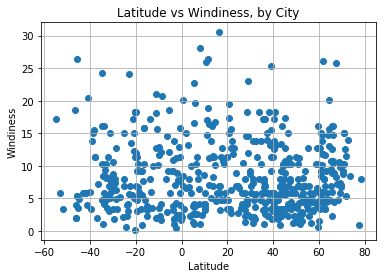

In [33]:
#Create scatterplot of latitude vs. tempurature
plt.scatter(open_weather_data['Latitude'], open_weather_data['Wind'], marker="o")

# Add lables for scatterplot
plt.title("Latitude vs Windiness, by City")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save image of scatterplot
plt.savefig("Latitude_v_Windiness_by_City.png")

#show the scatterplot
plt.show()